In [1]:
!pip install pandas matplotlib seaborn plotly


In [2]:
from google.colab import files

# Upload files from your local machine
uploaded = files.upload()


Saving Electricity demandHistoricalTrucks.csv to Electricity demandHistoricalTrucks.csv
Saving Electricity demandHistoricalCars.csv to Electricity demandHistoricalCars.csv
Saving Electricity demandHistoricalBuses.csv to Electricity demandHistoricalBuses.csv
Saving EV charging pointsHistoricalEV.csv to EV charging pointsHistoricalEV.csv
Saving EV salesHistoricalTrucks.csv to EV salesHistoricalTrucks.csv
Saving EV salesHistoricalCars.csv to EV salesHistoricalCars.csv
Saving EV salesHistoricalBuses.csv to EV salesHistoricalBuses.csv


In [6]:
import pandas as pd
ev_charging_points = pd.read_csv('EV charging pointsHistoricalEV.csv')
ev_sales_buses = pd.read_csv('EV salesHistoricalBuses.csv')
ev_sales_cars = pd.read_csv('EV salesHistoricalCars.csv')
ev_sales_trucks = pd.read_csv('EV salesHistoricalTrucks.csv')
electricity_demand_buses = pd.read_csv('Electricity demandHistoricalBuses.csv')
electricity_demand_cars = pd.read_csv('Electricity demandHistoricalCars.csv')
electricity_demand_trucks = pd.read_csv('Electricity demandHistoricalTrucks.csv')
ev_charging_points.head(), ev_sales_buses.head(), ev_sales_cars.head(), ev_sales_trucks.head(), electricity_demand_buses.head(), electricity_demand_cars.head(), electricity_demand_trucks.head()


(      region    category           parameter mode               powertrain  \
 0  Australia  Historical  EV charging points   EV  Publicly available fast   
 1  Australia  Historical  EV charging points   EV  Publicly available slow   
 2  Australia  Historical  EV charging points   EV  Publicly available fast   
 3  Australia  Historical  EV charging points   EV  Publicly available slow   
 4  Australia  Historical  EV charging points   EV  Publicly available slow   
 
    year             unit   value  
 0  2017  charging points    40.0  
 1  2017  charging points   440.0  
 2  2018  charging points    61.0  
 3  2018  charging points   670.0  
 4  2019  charging points  1700.0  ,
     region    category       parameter   mode powertrain  year      unit  \
 0  Belgium  Historical        EV stock  Buses        BEV  2010  Vehicles   
 1  Belgium  Historical  EV stock share  Buses         EV  2010   percent   
 2  Belgium  Historical  EV stock share  Buses         EV  2011   percent   

In [8]:
# Converting the 'year' column to datetime (if it's in numeric format, you can convert it to string or datetime)
datasets = [ev_charging_points, ev_sales_buses, ev_sales_cars, ev_sales_trucks, electricity_demand_buses, electricity_demand_cars, electricity_demand_trucks]
for df in datasets:
    df['year'] = pd.to_datetime(df['year'], format='%Y')


In [9]:
# Fill missing values using forward fill or drop rows with missing values
for df in datasets:
    df.fillna(method='ffill', inplace=True)
    # Alternatively, to drop rows with missing values:
    # df.dropna(inplace=True)


<ipython-input-9-9974e2ab7e76>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [10]:
for df in datasets:
    df.drop_duplicates(inplace=True)


In [11]:
# Check column names across datasets
for df in datasets:
    print(df.columns)


Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')
Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')
Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')
Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')
Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')
Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')
Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')


#EDA

In [12]:
# Display summary statistics
for df in datasets:
    print(df.describe())


                             year         value
count                         750  7.500000e+02
mean   2017-12-04 02:56:38.400000  3.827495e+04
min           2010-01-01 00:00:00  1.000000e-01
25%           2015-01-01 00:00:00  1.400000e+02
50%           2018-01-01 00:00:00  1.400000e+03
75%           2021-01-01 00:00:00  8.900000e+03
max           2023-01-01 00:00:00  2.500000e+06
std                           NaN  1.741407e+05
                                year          value
count                           1813    1813.000000
mean   2018-01-09 08:07:40.672917504    5466.839164
min              2010-01-01 00:00:00       0.000013
25%              2016-01-01 00:00:00       1.000000
50%              2019-01-01 00:00:00      19.000000
75%              2021-01-01 00:00:00     190.000000
max              2023-01-01 00:00:00  650000.000000
std                              NaN   43854.259018
                                year         value
count                           3798  3.798000e+0

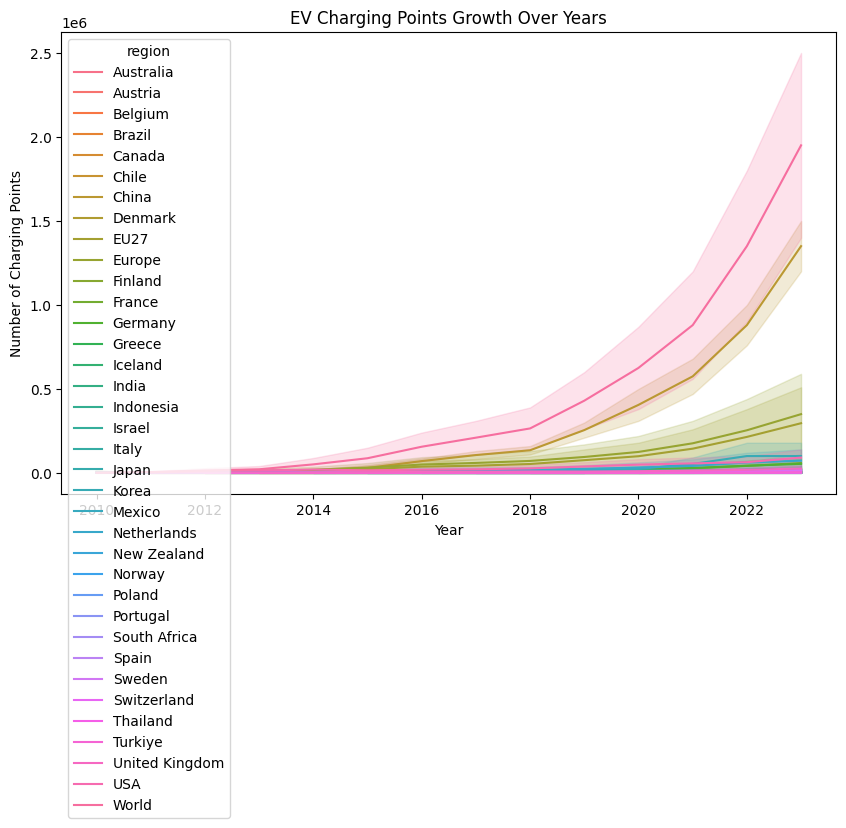

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot EV charging points growth over years
plt.figure(figsize=(10, 6))
sns.lineplot(data=ev_charging_points, x='year', y='value', hue='region')
plt.title('EV Charging Points Growth Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Charging Points')
plt.show()


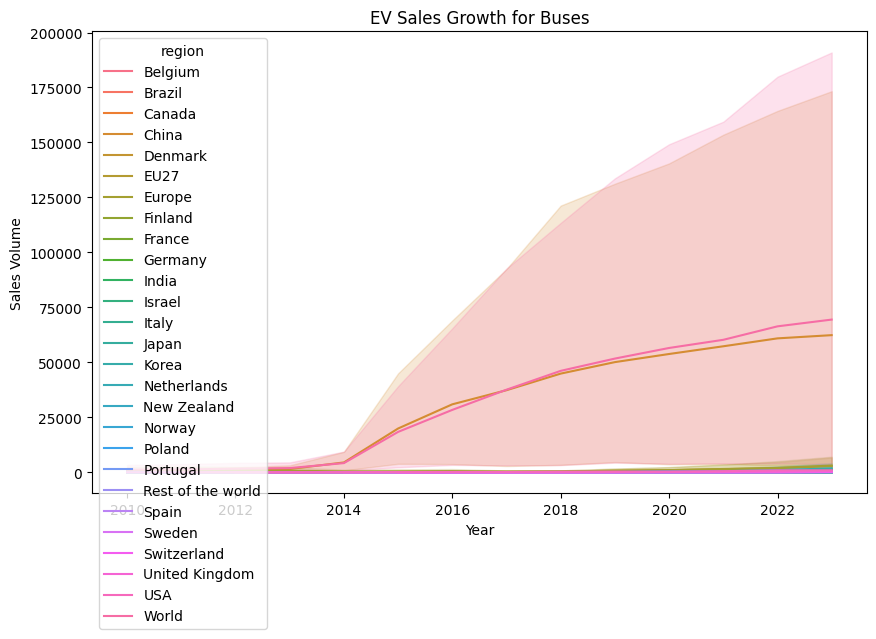

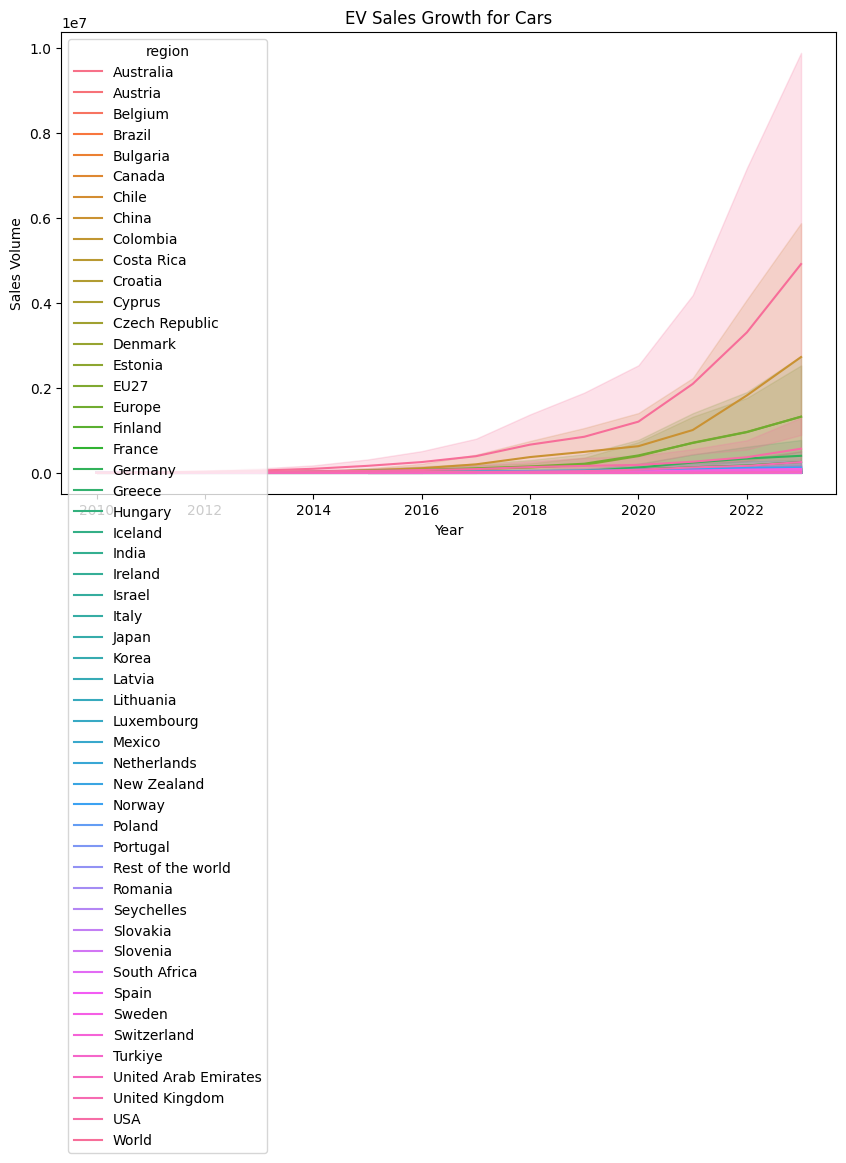

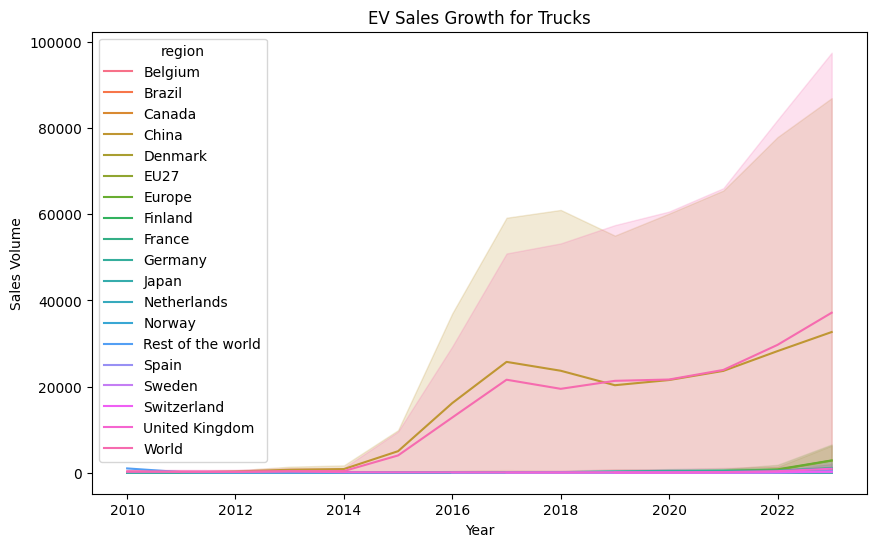

In [14]:
# Plot EV sales growth for buses
plt.figure(figsize=(10, 6))
sns.lineplot(data=ev_sales_buses, x='year', y='value', hue='region')
plt.title('EV Sales Growth for Buses')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.show()

# Plot EV sales growth for cars
plt.figure(figsize=(10, 6))
sns.lineplot(data=ev_sales_cars, x='year', y='value', hue='region')
plt.title('EV Sales Growth for Cars')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.show()

# Plot EV sales growth for trucks
plt.figure(figsize=(10, 6))
sns.lineplot(data=ev_sales_trucks, x='year', y='value', hue='region')
plt.title('EV Sales Growth for Trucks')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.show()


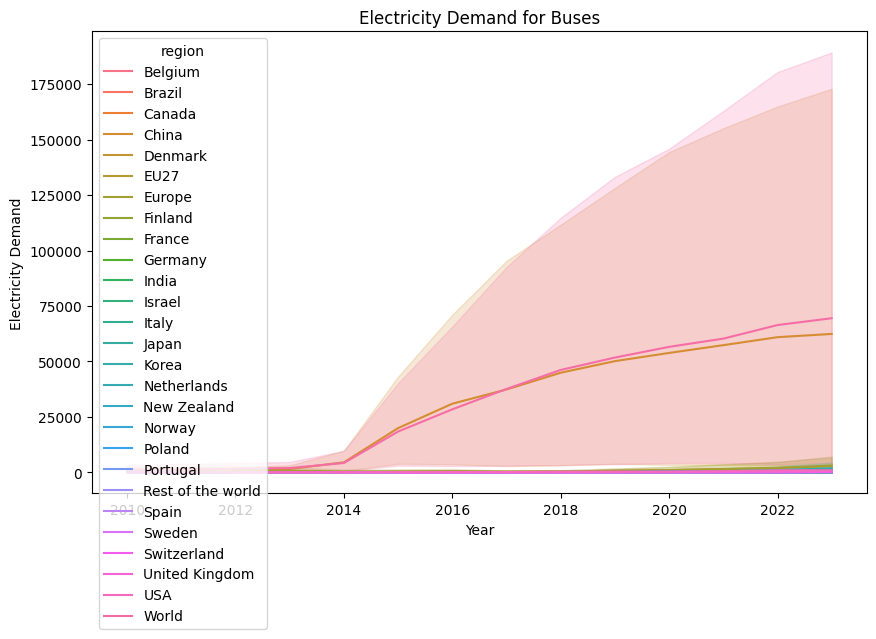

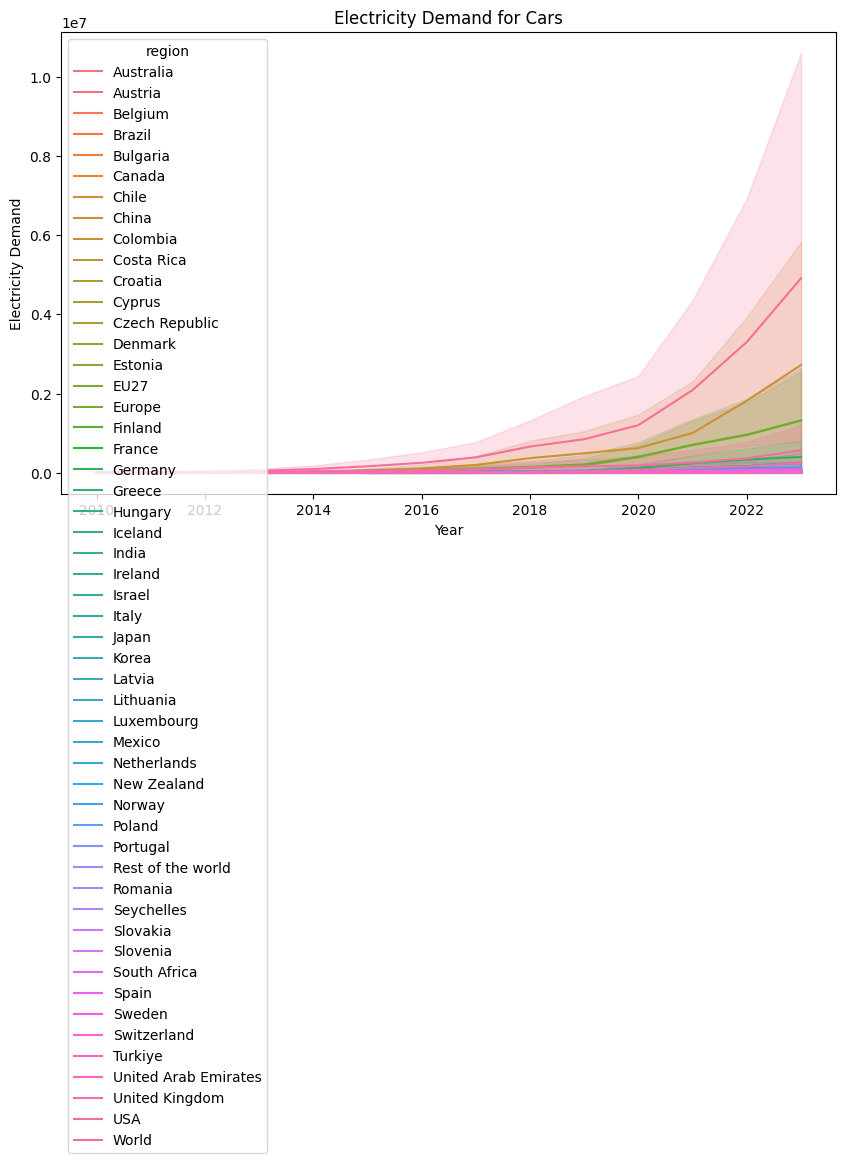

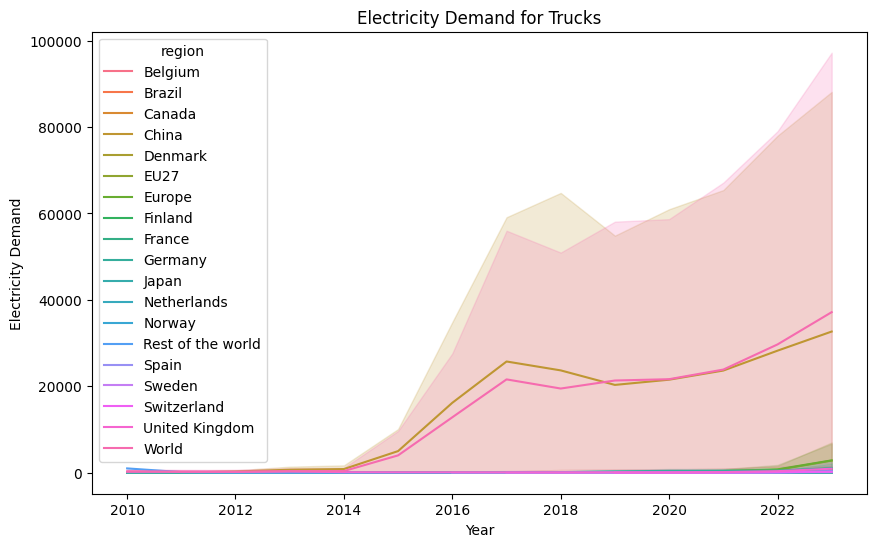

In [15]:
# Plot electricity demand for buses
plt.figure(figsize=(10, 6))
sns.lineplot(data=electricity_demand_buses, x='year', y='value', hue='region')
plt.title('Electricity Demand for Buses')
plt.xlabel('Year')
plt.ylabel('Electricity Demand')
plt.show()

# Plot electricity demand for cars
plt.figure(figsize=(10, 6))
sns.lineplot(data=electricity_demand_cars, x='year', y='value', hue='region')
plt.title('Electricity Demand for Cars')
plt.xlabel('Year')
plt.ylabel('Electricity Demand')
plt.show()

# Plot electricity demand for trucks
plt.figure(figsize=(10, 6))
sns.lineplot(data=electricity_demand_trucks, x='year', y='value', hue='region')
plt.title('Electricity Demand for Trucks')
plt.xlabel('Year')
plt.ylabel('Electricity Demand')
plt.show()


In [18]:
for df in datasets:
    # Select numeric columns only
    numeric_df = df.select_dtypes(include=['number'])

    # If 'year' is datetime, convert it to an integer year
    if 'year' in numeric_df.columns:
        numeric_df['year'] = numeric_df['year'].dt.year

    # Perform correlation analysis
    correlation_matrix = numeric_df.corr()
    print(f"Correlation matrix for {df}:\n", correlation_matrix)


Correlation matrix for         region    category           parameter mode               powertrain  \
0    Australia  Historical  EV charging points   EV  Publicly available fast   
1    Australia  Historical  EV charging points   EV  Publicly available slow   
2    Australia  Historical  EV charging points   EV  Publicly available fast   
3    Australia  Historical  EV charging points   EV  Publicly available slow   
4    Australia  Historical  EV charging points   EV  Publicly available slow   
..         ...         ...                 ...  ...                      ...   
745      World  Historical  EV charging points   EV  Publicly available fast   
746      World  Historical  EV charging points   EV  Publicly available fast   
747      World  Historical  EV charging points   EV  Publicly available slow   
748      World  Historical  EV charging points   EV  Publicly available slow   
749      World  Historical  EV charging points   EV  Publicly available fast   

          year  